# Results 
- Plot training/test telemetry values, predictions, smoothed errors, and predicted and actual anomalies
- A specified results file from the `results` dir is used to highlight anomalous regions and read in data from the `data` dir

In [1]:
import sys
import numpy as np
import os
sys.path.insert(0, '..')
import telemanom.helpers as helpers
from telemanom.plotting import Plotter
import pandas as pd
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode
import cufflinks as cf
import glob
cf.go_offline()
init_notebook_mode(connected=True)

%load_ext autoreload
%autoreload 2

C:\Users\Anthony\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Select set of results to visualize

In [2]:
# results_fn = '../results/2018-05-19_15.00.10.csv'
# print("Prior run: %s" %results_fn.split("/")[-1])

# Default to most recent
results_fn = glob.glob('../results/*.csv')[-1]
print('Using most recent run: {}'.format(results_fn.split("/")[-1]))

run_id = results_fn.split("/")[-1][:-4]

parts = run_id.split('\\')
run_id = f'{parts[1]}'
print(run_id)


Using most recent run: results\2023-10-02_11.56.58.csv
2023-10-02_11.56.58


## Parameters
- See `config.yaml` for parameter explanations

In [3]:
with open('../data/logs/{}.log'.format(run_id), 'r') as f:
    for i,row in enumerate(f.readlines()):
        if len(row) < 2:
            break
        if i > 0:
            print(' '.join(row.split(' ')[3:]).replace('\n',''))

Stream # 1: phoenixws_average_14
normalized prediction error: 0.02
Channel Stats: TP: 1  FP: 0  FN: 1
Total true positives: 1
Total false positives: 0
Total false negatives: 1


## Summary of results

In [4]:
plotter = Plotter(run_id)
plotter.all_result_summary()

True Positives: 12
False Positives: 0
False Negatives: 12

Precision: 1.00
Recall: 0.50


## Interactive inline Plotly charts for viewing `y_test`, `y_hat`, and `smoothed errors (e_s)`
- **Blue** highlighted regions indicate anomalous sequences detected by the system
- If available, **Red** highlighted regions indicate true anomalous regions
- Can also optionally plot training data by setting `plot_train=True`

Channel: phoenixws_average_8
Normalized prediction error: 0.02
------------------
True Positives: 1
False Positives: 0
False Negatives: 1
------------------
Predicted anomaly scores: [{'start_idx': 11100, 'end_idx': 11199, 'score': 13.470777623173257}, {'start_idx': 11200, 'end_idx': 11299, 'score': 14.800540274893597}, {'start_idx': 11300, 'end_idx': 11399, 'score': 15.002772946512481}, {'start_idx': 11400, 'end_idx': 11499, 'score': 14.487405344264362}, {'start_idx': 11500, 'end_idx': 11599, 'score': 14.091329053420788}, {'start_idx': 11600, 'end_idx': 11699, 'score': 13.636424615468238}, {'start_idx': 11700, 'end_idx': 11799, 'score': 13.192708797430344}, {'start_idx': 11800, 'end_idx': 11899, 'score': 12.78890667937048}, {'start_idx': 11900, 'end_idx': 11999, 'score': 12.512879086391777}, {'start_idx': 12000, 'end_idx': 12099, 'score': 12.213610880367641}, {'start_idx': 12100, 'end_idx': 12199, 'score': 11.84850361043603}, {'start_idx': 12200, 'end_idx': 12299, 'score': 11.59505454

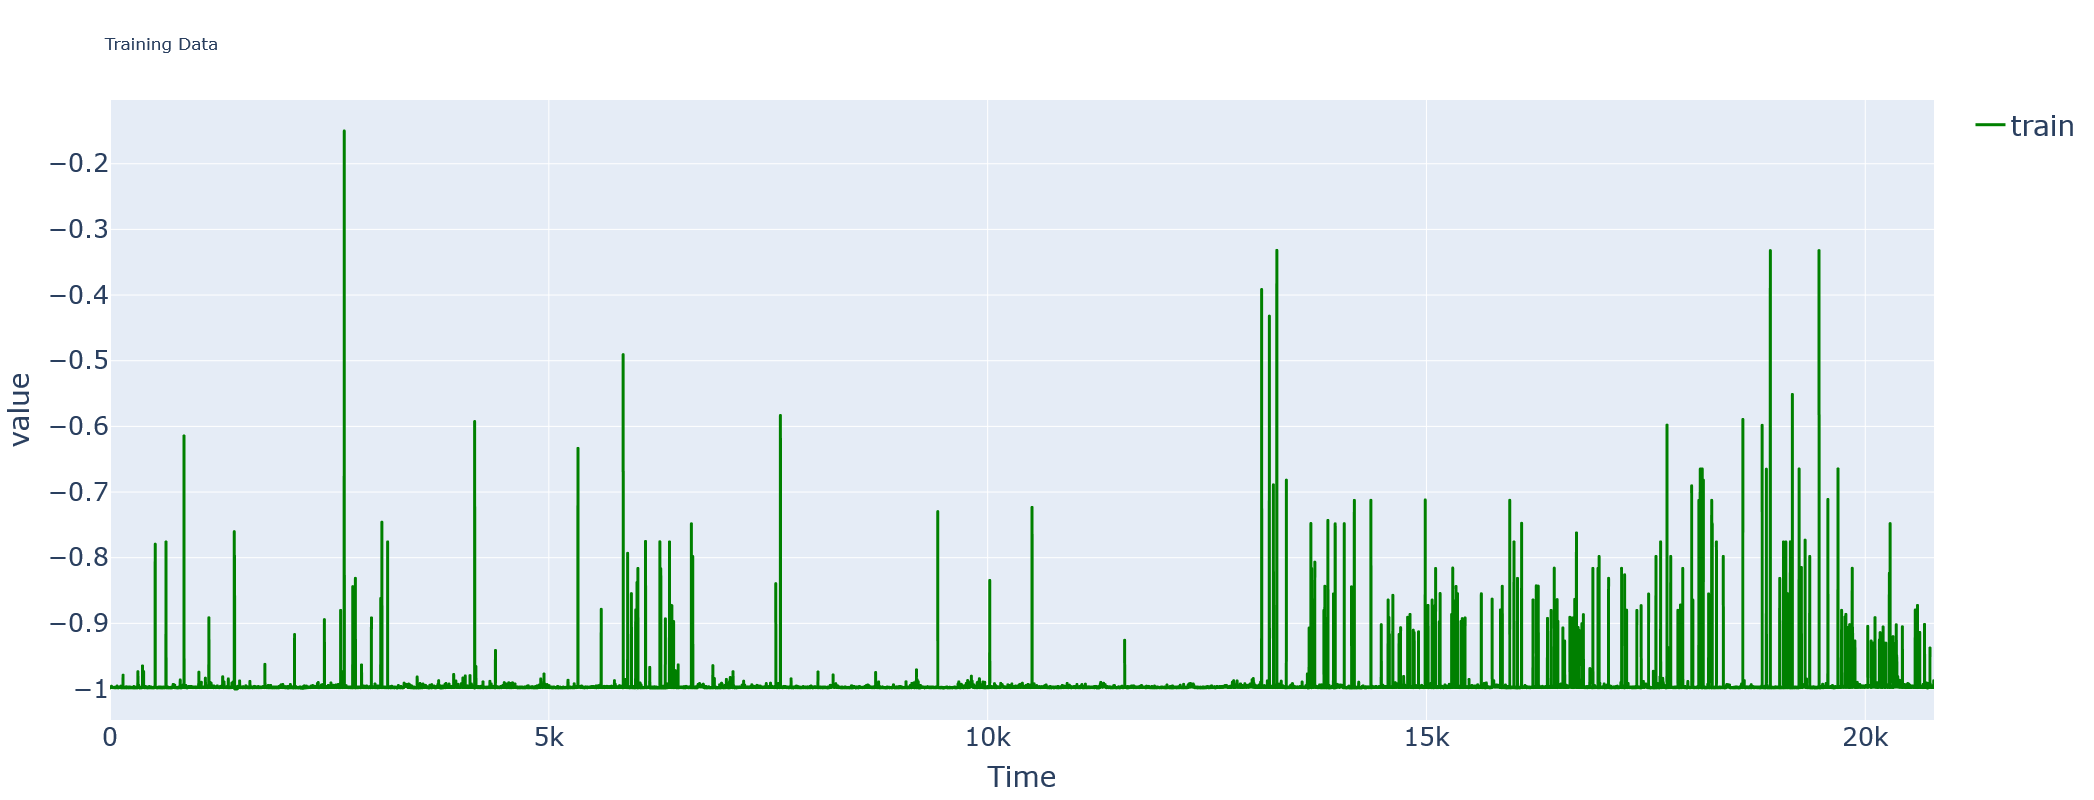

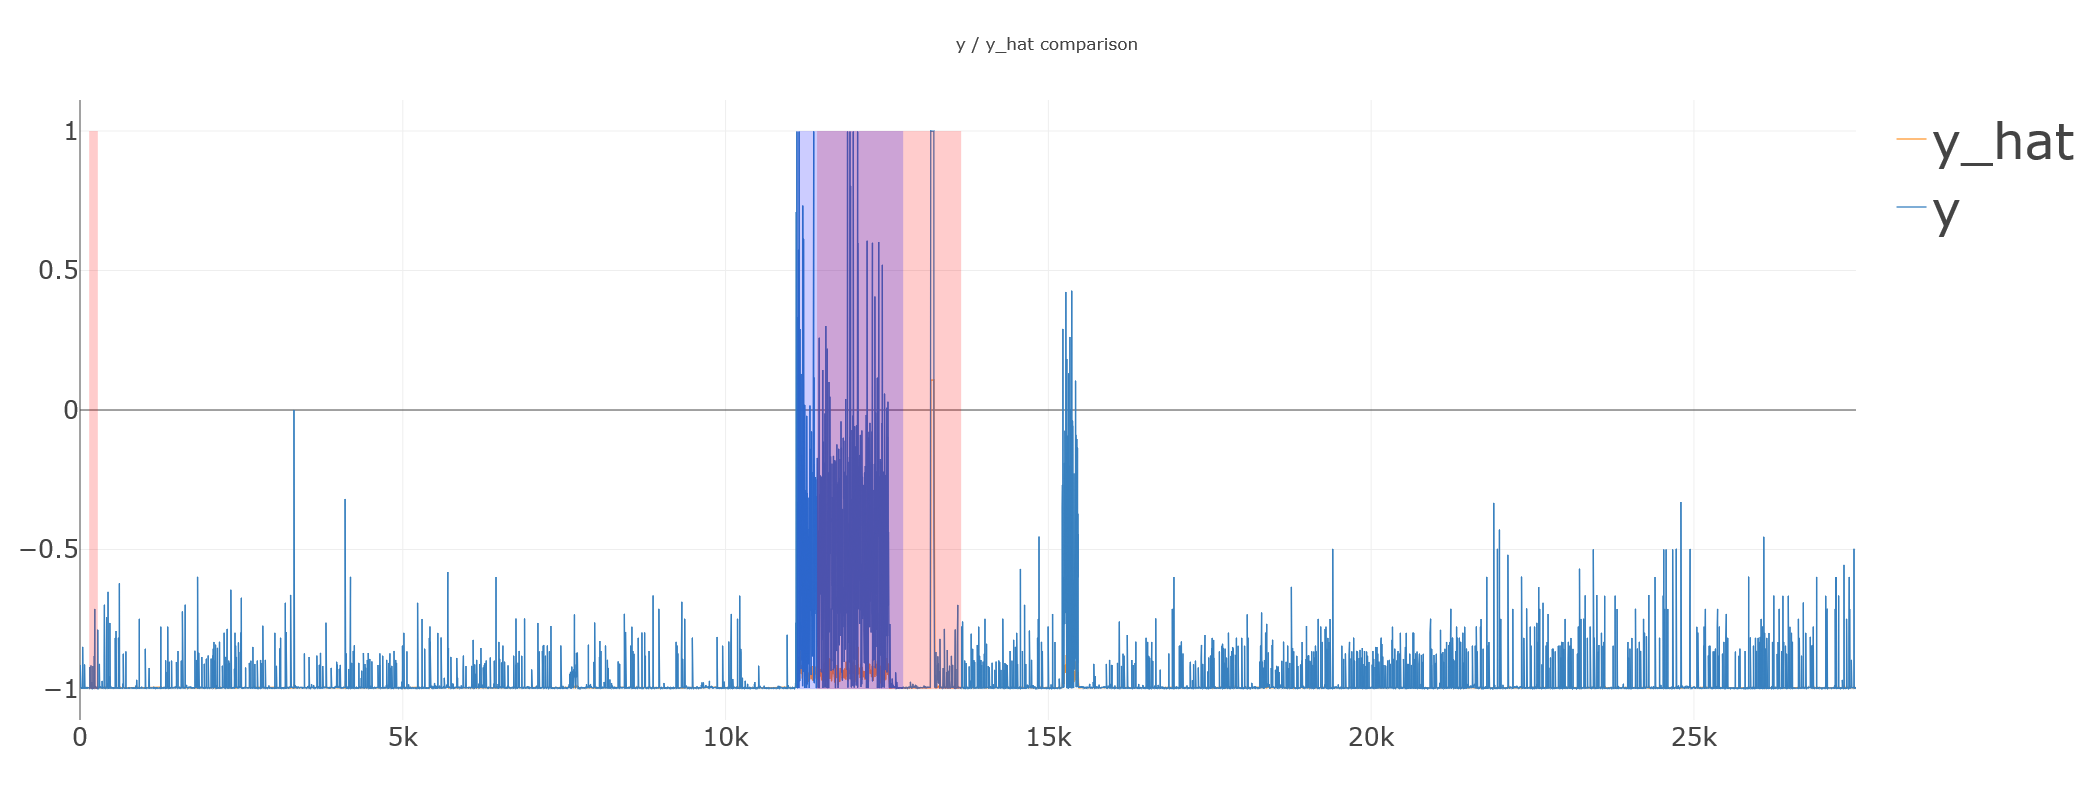

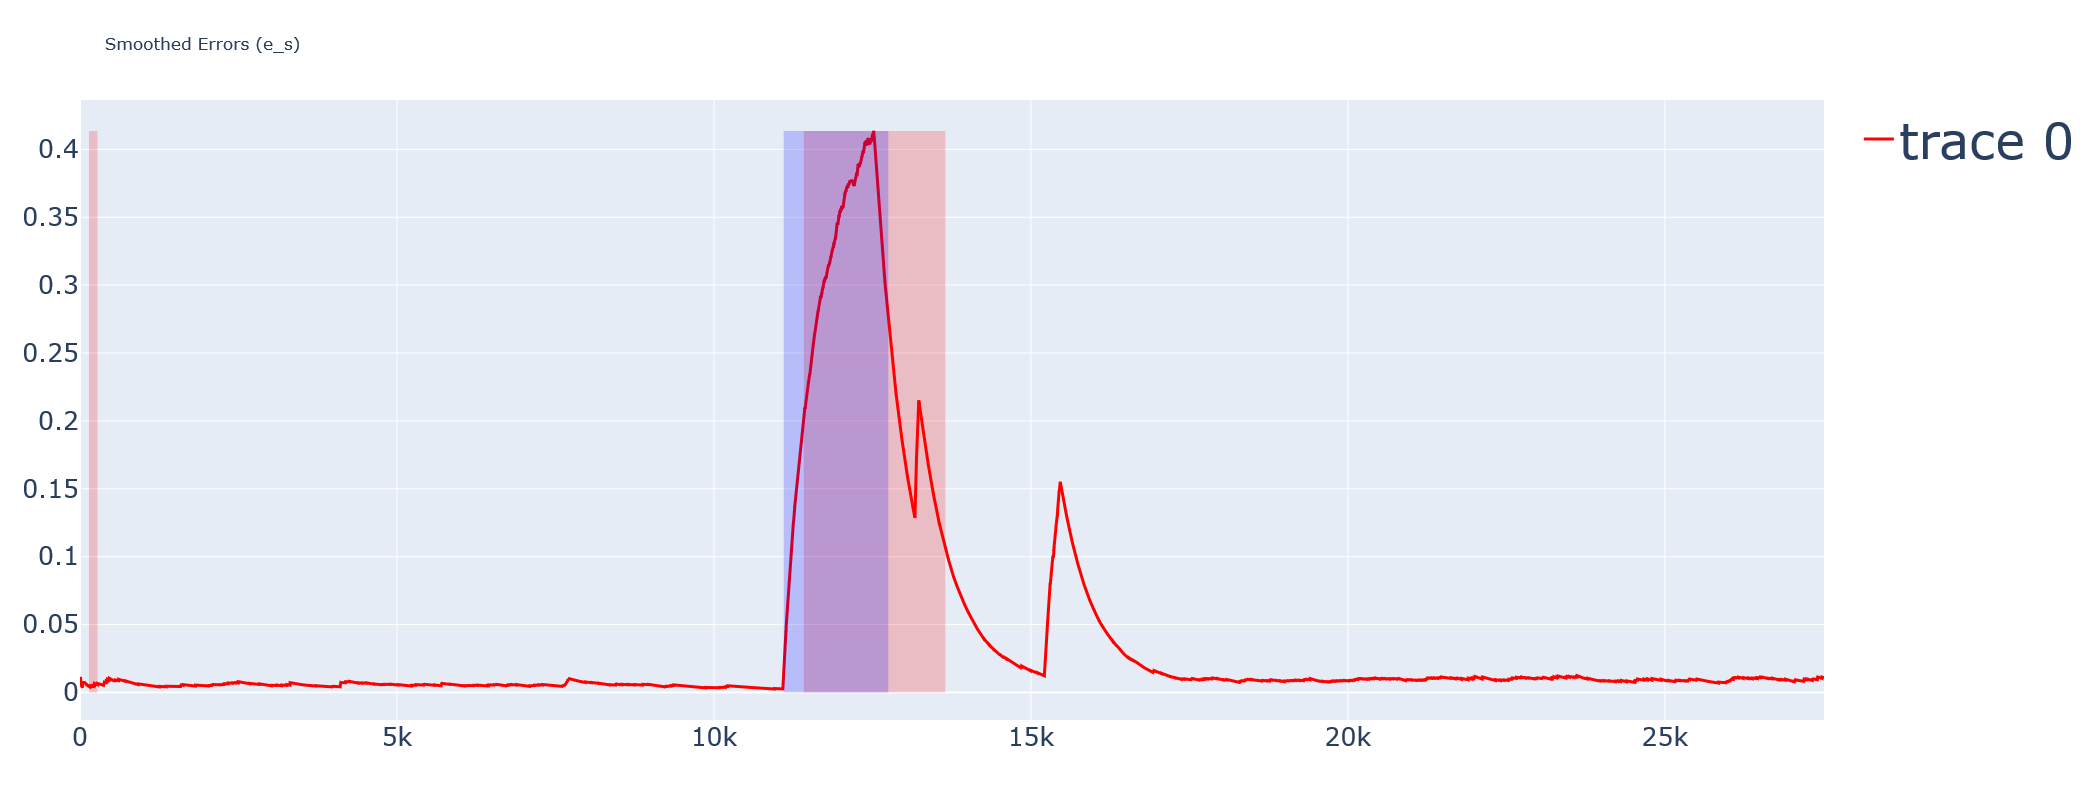

In [45]:
plotter.plot_channel('phoenixws_average_8',plot_errors=True, plot_train=True)